### Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

### Leitura de datasets

In [2]:
# Carregar datasets
df_train = pd.read_csv(r'X:\Dissertacao\python_projects\dataset\ISCX-Bot-2014\ISCX_csv\Testing_file.csv',
                       encoding='ISO-8859-1')

df_test = pd.read_csv(r'X:\Dissertacao\python_projects\dataset\ISCX-Bot-2014\ISCX_csv\Training_file.csv',
                      encoding='ISO-8859-1')

### Exploração dos dados

In [3]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114514 entries, 0 to 5114513
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   No.          int64  
 1   Time         float64
 2   Source       object 
 3   Destination  object 
 4   Protocol     object 
 5   Length       int64  
 6   Info         object 
dtypes: float64(1), int64(2), object(4)
memory usage: 273.1+ MB


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,NaN,NaN,Ethernet,60,[Packet size limited during capture]
1,2,6.985427,0.0.0.0,255.255.255.255,DHCP,348,DHCP Discover - Transaction ID 0x6145b920
2,3,6.985565,10.0.2.2,10.0.2.15,DHCP,590,DHCP Offer - Transaction ID 0x6145b920
3,4,6.985927,0.0.0.0,255.255.255.255,DHCP,373,DHCP Request - Transaction ID 0x6145b920
4,5,6.985998,10.0.2.2,10.0.2.15,DHCP,590,DHCP ACK - Transaction ID 0x6145b920


In [4]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388270 entries, 0 to 9388269
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   No.          int64  
 1   Time         float64
 2   Source       object 
 3   Destination  object 
 4   Protocol     object 
 5   Length       int64  
 6   Info         object 
dtypes: float64(1), int64(2), object(4)
memory usage: 501.4+ MB


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
1,2,8.982709,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
2,3,50.099564,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
3,4,50.369266,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85
4,5,51.369054,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85


In [5]:
print("Treino (nulos):\n",df_train.isnull().sum())  
print("Teste (nulos):\n",df_test.isnull().sum())  

Treino (nulos):
 No.               0
Time              0
Source            1
Destination       1
Protocol          0
Length            0
Info           3898
dtype: int64
Teste (nulos):
 No.                0
Time               0
Source             0
Destination        0
Protocol           0
Length             0
Info           49110
dtype: int64


In [6]:
print(df_train['Time'].describe())  
print("Valores negativos de tempo: ", (df_train['Time'] < 0).sum())  

count    5.114514e+06
mean     1.284569e+09
std      4.879074e+07
min      0.000000e+00
25%      1.276250e+09
50%      1.276579e+09
75%      1.313450e+09
max      1.359942e+09
Name: Time, dtype: float64
Valores negativos de tempo:  0


In [7]:
print(df_test['Time'].describe())  
print("Valores negativos de tempo: ", (df_test['Time'] < 0).sum()) 

count    9.388270e+06
mean    -4.999973e+07
std      3.936417e+07
min     -1.211172e+08
25%     -3.664793e+07
50%     -3.662771e+07
75%     -3.659487e+07
max      7.802317e+05
Name: Time, dtype: float64
Valores negativos de tempo:  8171941


In [8]:
print("Protocolos em Training:")
print(df_train["Protocol"].unique())
# ________________________________ #
print("\nProtocolos em Testing:")
print(df_test["Protocol"].unique())

Protocolos em Training:
['Ethernet' 'DHCP' 'ARP' 'SSDP' 'ICMP' 'IGMPv3' 'NBNS' 'BROWSER' 'DNS'
 'TCP' 'HTTP' 'NBSS' 'SMB' 'LANMAN' 'DCERPC' 'SRVSVC' 'WKSSVC' 'SPOOLSS'
 'SMB Pipe' 'UDP' 'SSLv2' 'IRC' 'TLSv1' 'SNMP' 'SMTP' 'SMTP/IMF' 'SSLv3'
 'NTP' 'HTTP/JSON' 'IPv4' 'SSH' 'PKIX-CRL' 'RDP' 'COTP' 'T.125' 'HTTP/XML'
 'CLASSIC-STUN' 'IOXIDResolver' 'ISystemActivator' 'X11' 'RTCP' 'SSL'
 'SIP' 'DB-LSP-DISC/JSON' 'ICMPv6' 'LLMNR' 'UDP/XML' 'DHCPv6' 'STP'
 'RIPv2' '0x0000' 'DB-LSP-DISC' '0x0700' 'LLDP' 'IPX SAP' 'NBDS' 'SRVLOC'
 'BOOTP' '0xffff' 'MDNS' 'IGMPv1' '0x4b0d' '0x4000' 'LLC' '0xe000' 'SSHv2'
 '0x3339' 'IGMPv2' 'IPv6' 'DTLS' 'eDonkey' 'ALLJOYN-NS'
 'openSAFETY over UDP' '0x2aa1' 'ECMP' 'TCP, HiPerConTracer' 'H1'
 'BitTorrent' 'SIGCOMP' 'MSMMS' 'TRDP' 'QUAKEWORLD' 'ECHO' 'H.225.0'
 'GPRS-NS' '5co-legacy' 'UDP, HiPerConTracer' 'WSP' 'QUAKE3' '0xc8d8'
 'VxLAN' '0xb0c8' '0x9cb1' '0x33a5' 'MSNMS' 'FIND' 'CIP I/O' 'POP'
 'POP/IMF' 'BT-DHT' 'LSD' 'WireGuard' 'FTP' 'FTP-DATA' 'IMAP' 'KDP'
 

In [9]:
print(df_train['Length'].describe())  # Min, max, mean, etc.
print("============================")
print(df_test['Length'].describe())  # Min, max, mean, etc.

count    5.114514e+06
mean     4.545508e+02
std      1.057905e+03
min      4.200000e+01
25%      6.000000e+01
50%      6.700000e+01
75%      6.240000e+02
max      6.523800e+04
Name: Length, dtype: float64
count    9.388270e+06
mean     5.448353e+02
std      6.522112e+02
min      5.400000e+01
25%      6.000000e+01
50%      9.600000e+01
75%      1.434000e+03
max      1.903400e+04
Name: Length, dtype: float64


### Limpeza dos dados

In [10]:
df_train.fillna({"Info": "Unknown"}, inplace=True)
df_test.fillna({"Info": "Unknown"}, inplace=True)
df_train.dropna(subset=['Source', 'Destination'], inplace=True)
df_test.dropna(subset=['Source', 'Destination'], inplace=True)

In [11]:
# Converter features categóricas
df_train['Protocol'] = df_train['Protocol'].astype('category').cat.codes
df_train['Source'] = df_train['Source'].astype('category').cat.codes
df_train['Destination'] = df_train['Destination'].astype('category').cat.codes

df_test['Protocol'] = df_test['Protocol'].astype('category').cat.codes
df_test['Source'] = df_test['Source'].astype('category').cat.codes
df_test['Destination'] = df_test['Destination'].astype('category').cat.codes

### Engenharia de *Features*

In [12]:
df_train['Time_Diff'] = df_train['Time'].diff().fillna(df_train['Time'].mean())
df_test['Time_Diff'] = df_test['Time'].diff().fillna(df_test['Time'].mean())

df_train['Packet_Rate'] = df_train.groupby("Source")['Time'].transform(lambda x: x.count() / (x.max() - x.min() + 1e-6))
df_test['Packet_Rate'] = df_test.groupby("Source")['Time'].transform(lambda x: x.count() / (x.max() - x.min() + 1e-6))

df_train["Inter_Arrival_Time"] = df_train.groupby("Source")["Time_Diff"].transform("mean")
df_test["Inter_Arrival_Time"] = df_test.groupby("Source")["Time_Diff"].transform("mean")

df_train["Burst_Rate"] = (1 / df_train["Inter_Arrival_Time"]).replace([np.inf, -np.inf], 0)
df_test["Burst_Rate"] = (1 / df_test["Inter_Arrival_Time"]).replace([np.inf, -np.inf], 0)

df_train.fillna({"Burst_Rate": 0}, inplace=True)
df_test.fillna({"Burst_Rate": 0}, inplace=True)

df_train["Log_Length"] = np.log1p(df_train["Length"])
df_test["Log_Length"] = np.log1p(df_test["Length"])

df_train["Log_Packet_Rate"] = np.log1p(df_train["Packet_Rate"])
df_test["Log_Packet_Rate"] = np.log1p(df_test["Packet_Rate"])

In [13]:
# Escalonamento
features = ["Time", "Time_Diff", "Packet_Rate", "Inter_Arrival_Time", "Burst_Rate", "Log_Length", "Log_Packet_Rate"]
scaler = MinMaxScaler()
scaler.fit(df_train[features])
df_train_scaled = pd.DataFrame(scaler.transform(df_train[features]), columns=features)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[features]), columns=features)

In [14]:
# remover duplicados (problemas de duplicação de valores)
df_train_scaled = df_train_scaled.drop_duplicates()
df_test_scaled = df_test_scaled.drop_duplicates()

# adicionar ruído para tratar valores muito idênticos (problemas de duplicação de valores)
df_train_scaled += np.random.normal(0, 1e-6, df_train_scaled.shape)
df_test_scaled += np.random.normal(0, 1e-6, df_test_scaled.shape)

# reduzir precisão (motivos de computação)
df_train_scaled = df_train_scaled.astype("float32")
df_test_scaled = df_test_scaled.astype("float32")

### Treinar primeiro modelo (*Isolation Forest*)

In [15]:
# Isolation Forest
iso_forest = IsolationForest(
    n_estimators=500,
    contamination=0.2,
    #max_samples=0.5, -> train (20%), test (100%) 
    random_state=45,
    verbose=1) 

iso_forest.fit(df_train_scaled)
df_train_scaled["Anomaly_IForest"] = iso_forest.predict(df_train_scaled)
df_test_scaled["Anomaly_IForest"] = iso_forest.predict(df_test_scaled)

print(f"Anomalias em Training (IForest): {(df_train_scaled['Anomaly_IForest'] == -1).sum() / len(df_train_scaled) * 100:.2f}%")
print(f"Anomalias em Testing (IForest): {(df_test_scaled['Anomaly_IForest'] == -1).sum() / len(df_test_scaled) * 100:.2f}%")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   58.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   14.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   58.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   31.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  4.2min


Anomalias em Training (IForest): 20.00%
Anomalias em Testing (IForest): 54.33%


### Treinar segundo modelo (OCSVM, AutoEncoder, LOF)

In [17]:
'''
Devido ao hiperparametro n_neighbors, quanto maior o valor da vizinhança,
maior o consumo de memória. Este consumo pode crescer rapidamente, ainda mais 
com o uso de muitos dados, então usamos apenas uma amostra dos dados, 
para treinar o algoritmo e não usar tanto poder computacional.
'''

batch_size = 70_000

lof = LocalOutlierFactor(
    n_neighbors=100, # 50 e 100 deu aviso de duplicados, mas não havia a iteração acima. 150 é demasiado. 
    contamination=0.2, 
    metric="chebyshev", # metricas: euclidean- default, chebyshev - network logs, manhattan - packet-based data
    novelty=False,
    n_jobs=-1) # processamento em paralelo

def lof_predict(data, batch_size):
    y_pred = np.zeros(len(data))
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        y_pred[i:i + batch_size] = lof.fit_predict(batch)
    return y_pred

df_train_scaled['Anomaly_LOF'] = lof_predict(df_train_scaled, batch_size)
df_test_scaled['Anomaly_LOF'] = lof_predict(df_test_scaled, batch_size)

print(f"Anomalias em Training (LOF): {(df_train_scaled['Anomaly_LOF'] == -1).sum() / len(df_train_scaled)*100:.2f}%")
print(f"Anomalias em Testing (LOF): {(df_test_scaled['Anomaly_LOF'] == -1).sum() /len(df_test_scaled)*100:.2f}%")

Anomalias em Training (LOF): 20.00%
Anomalias em Testing (LOF): 20.00%


### Visualização gráfica dos resultados.

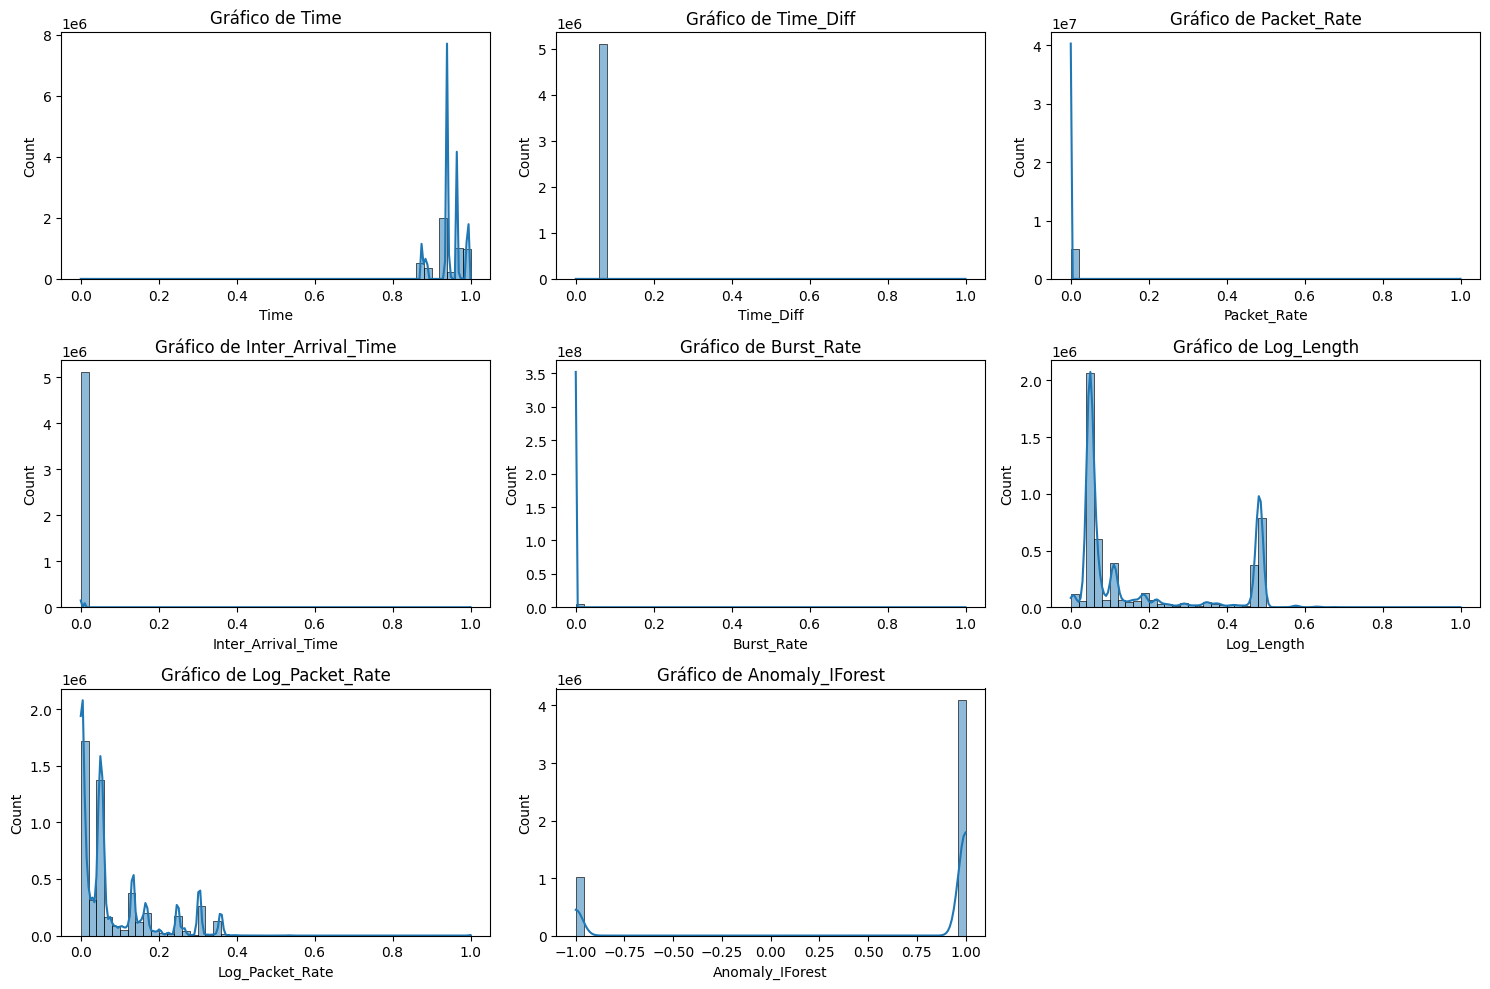

In [18]:
# Histograma de distribuição de features
features = df_train_scaled.columns[:-1]  # Exclui rótulos de anomalias
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train_scaled[feature], bins=50, kde=True)
    plt.title(f"Gráfico de {feature}")
plt.tight_layout()
plt.show()

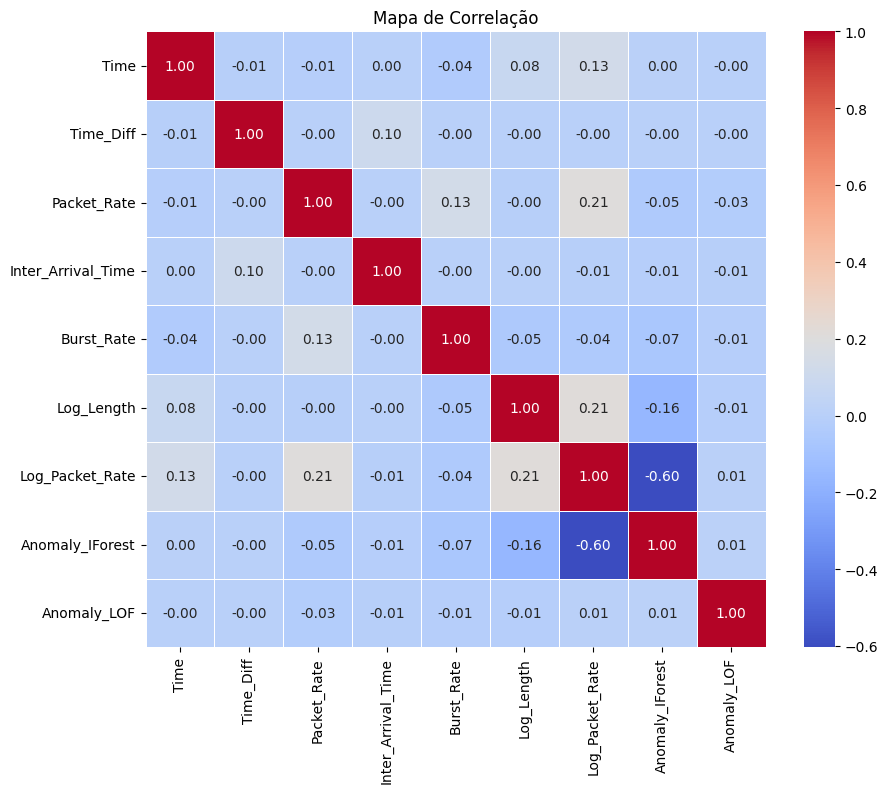

In [19]:
# Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

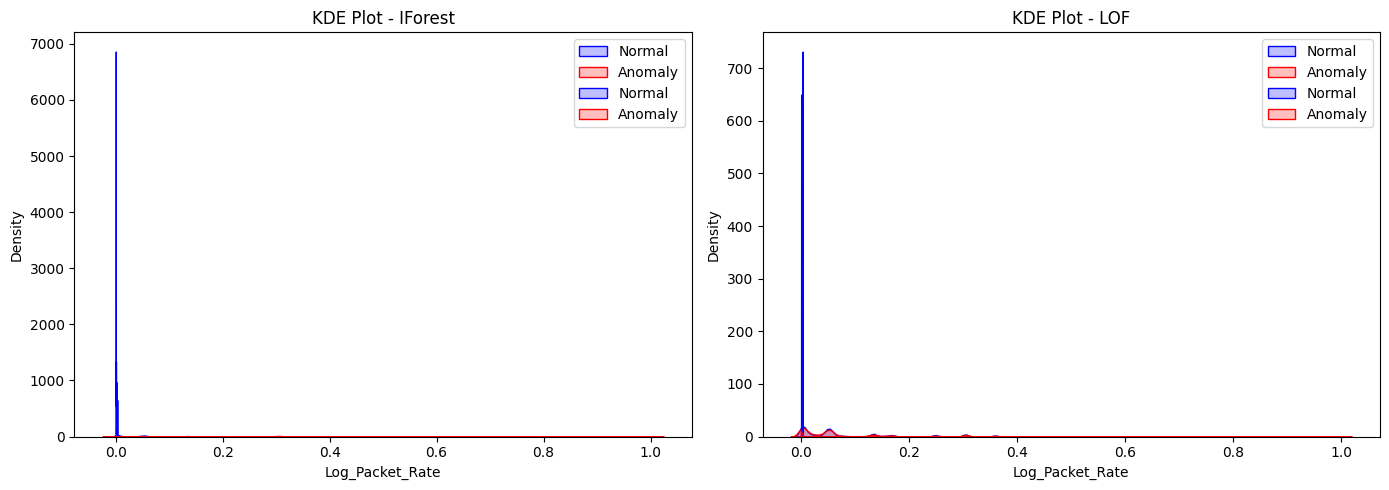

In [20]:
# KDE (Kernel Density Estimation)
selected_features = ["Log_Packet_Rate", "Burst_Rate"]  # Pick two or three relevant ones

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for feature in selected_features:
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_IForest"] == 1][feature], 
                label="Normal", color="blue", ax=axes[0], fill=True)
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_IForest"] == -1][feature], 
                label="Anomaly", color="red", ax=axes[0], fill=True)
    
axes[0].set_title("KDE Plot - IForest")
axes[0].legend()

for feature in selected_features:
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_LOF"] == 1][feature], 
                label="Normal", color="blue", ax=axes[1], fill=True)
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_LOF"] == -1][feature], 
                label="Anomaly", color="red", ax=axes[1], fill=True)
    
axes[1].set_title("KDE Plot - LOF")
axes[1].legend()

plt.tight_layout()
plt.show()